# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

#2.Loading the dataset

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")


In [5]:
df.tail(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

#3.Visualization Analysis

## a.Univariate Analysis

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

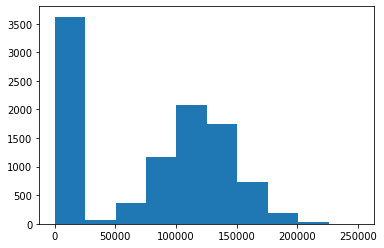

In [12]:
plt.hist(df["Balance"])

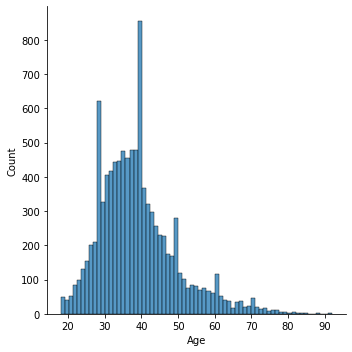

In [13]:
sns.displot(df["Age"])

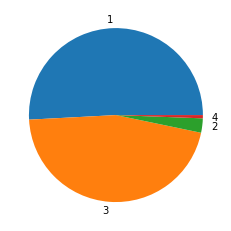

In [15]:
plt.pie(df["NumOfProducts"].value_counts(), labels = df["NumOfProducts"].unique())
plt.show()

## b.Bi - Variate Analysis

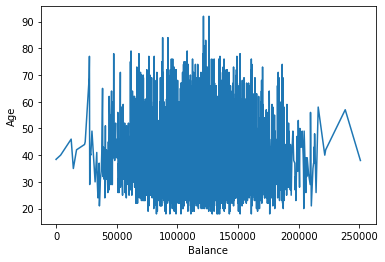

In [18]:
sns.lineplot(x=df.Balance,y=df.Age)

<BarContainer object of 10000 artists>

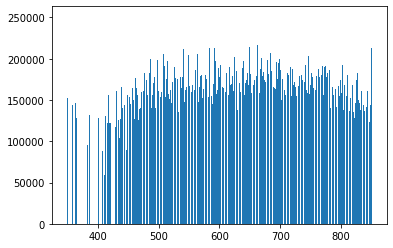

In [19]:
plt.bar(df.CreditScore, df.Balance)

## c.Multi - Variate Analysis

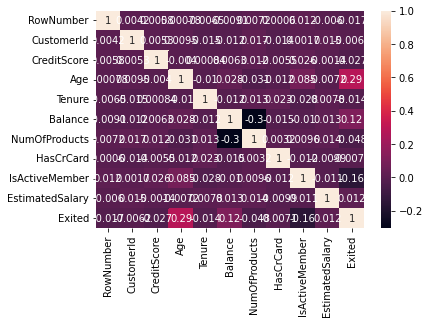

In [20]:
sns.boxplot(x=df["Age"])
sns.heatmap(df.corr(),annot=True)

# 4 - Descriptive Statistics

In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5 - Handle the Missing values

In [22]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6 - Find Outliers and Replacing

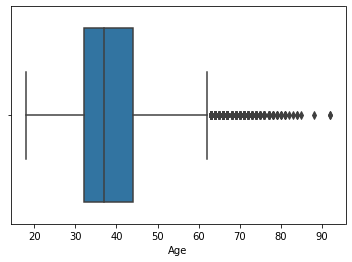

In [24]:
sns.boxplot(x=df["Age"])

In [25]:
q2 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR
print(lower_limit)
print(upper_limit)
df["Age"].head

14.0
62.0


<bound method NDFrame.head of 0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64>

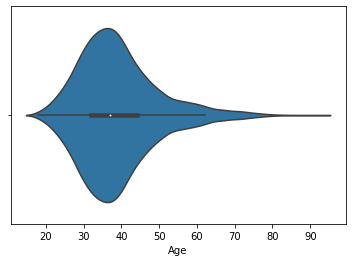

In [29]:
df["Age"] = np.where(df["Age"]<lower_limit,6.52,df["Age"])
sns.violinplot(x=df["Age"])


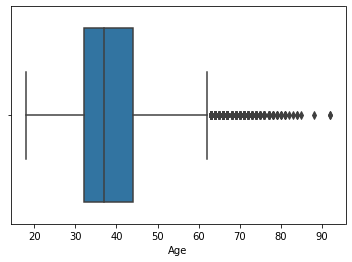

In [28]:
sns.boxplot(x=df["Age"])

# 7 - Categorical Columns and perform Encoding

## Method-1: Label Encoding

In [30]:
print(df['Geography'].unique())
print(df['Surname'].unique())


['France' 'Spain' 'Germany']
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [32]:
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Surname'] = le.fit_transform(df['Surname'])
print(df["Geography"])
print(df["Surname"])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64
0       1115
1       1177
2       2040
3        289
4       1822
        ... 
9995    1999
9996    1336
9997    1570
9998    2345
9999    2751
Name: Surname, Length: 10000, dtype: int64


## Method-2: Feature Map

In [33]:
print(df.Gender.unique())

['Female' 'Male']


In [34]:
df['Gender']=df['Gender'].replace(['Female','Male'],[0,1])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


# 8 - Split the Data into Dependent and Independent Variables

In [37]:
x = df.drop("EstimatedSalary",axis=1)
y = df["EstimatedSalary"]

print(x)

X:-       RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0             1    15634602     1115          619          0       0  42.0   
1             2    15647311     1177          608          2       0  41.0   
2             3    15619304     2040          502          0       0  42.0   
3             4    15701354      289          699          0       0  39.0   
4             5    15737888     1822          850          2       0  43.0   
...         ...         ...      ...          ...        ...     ...   ...   
9995       9996    15606229     1999          771          0       1  39.0   
9996       9997    15569892     1336          516          0       1  35.0   
9997       9998    15584532     1570          709          0       0  36.0   
9998       9999    15682355     2345          772          1       1  42.0   
9999      10000    15628319     2751          792          0       0  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActive

In [38]:
print(y)


0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64


# 9 - Scale the Independent Variables

In [40]:
scaled_X = pd.DataFrame(scale(x),columns=x.columns)
scaled_X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-1.731878,-0.783213,-0.464183,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-1.731531,-0.606534,-0.390911,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-1.731185,-0.995885,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,-1.730838,0.144767,-1.440356,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,-1.730492,0.652659,0.371354,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,0.580534,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.505775
9996,1.730838,-1.682806,-0.203004,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,-0.505775
9997,1.731185,-1.479282,0.073539,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,1.977165
9998,1.731531,-0.119356,0.989439,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,1.977165


# 10 - Split the Data into Training and Testing

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_X, y, test_size=0.3, random_state=0)

In [42]:
Xtrain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7681,0.928899,-0.797032,-1.475810,-0.098592,-0.901886,0.912419,-0.564665,-1.041760,1.117213,0.807737,0.646092,0.970243,1.977165
9031,1.396553,0.714314,-1.588081,-1.133270,-0.901886,0.912419,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-0.505775
3691,-0.453278,0.963450,-0.240822,-0.626278,-0.901886,-1.095988,3.535540,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-0.505775
202,-1.661903,-1.250707,-0.427547,-1.391939,1.515067,0.912419,1.056346,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,1.977165
5625,0.216680,-0.385174,-1.478173,-1.474714,-0.901886,-1.095988,2.009882,0.687130,1.070229,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.463756,-1.473777,1.385344,-0.584891,0.306591,-1.095988,-0.660018,-0.350204,0.698607,0.807737,0.646092,0.970243,-0.505775
4859,-0.048671,-0.609314,1.530707,1.484464,1.515067,-1.095988,-1.613554,-0.350204,0.608299,-0.911583,0.646092,0.970243,-0.505775
3264,-0.601195,-1.620525,-0.361366,0.905045,-0.901886,0.912419,-0.373958,-0.004426,1.358909,0.807737,0.646092,-1.030670,-0.505775
9845,1.678530,-0.374039,0.725896,-0.626278,1.515067,-1.095988,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,-0.505775


In [43]:
Xtest

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9394,1.522299,-1.045250,1.398344,-0.553850,0.306591,-1.095988,-0.373958,1.032908,0.875323,-0.911583,0.646092,0.970243,-0.505775
898,-1.420801,-0.503813,-0.782089,-1.319512,-0.901886,-1.095988,0.102810,-1.041760,0.424422,-0.911583,0.646092,-1.030670,1.977165
2398,-0.901186,-0.793292,0.412717,0.573948,1.515067,-1.095988,0.293517,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.505775
5906,0.314021,0.760190,1.590979,1.422384,-0.901886,0.912419,-0.660018,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.505775
2343,-0.920239,1.042107,-0.603636,0.573948,0.306591,0.912419,-0.087897,-0.004426,1.387129,0.807737,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,-0.344851,0.661806,-0.626091,-1.247084,1.515067,-1.095988,0.198164,-0.350204,-1.225848,0.807737,-1.547768,0.970243,-0.505775
7375,0.822897,-0.723866,-1.266630,-0.119286,-0.901886,0.912419,3.630893,0.341352,0.071162,0.807737,0.646092,0.970243,-0.505775
9307,1.492162,-0.146464,0.686897,0.356666,-0.901886,0.912419,0.102810,-1.041760,1.466728,0.807737,0.646092,0.970243,-0.505775
8394,1.175889,-1.292287,-1.384811,0.429093,-0.901886,0.912419,2.868064,1.724464,1.257616,-0.911583,0.646092,0.970243,-0.505775


In [44]:
ytrain

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64

In [45]:
ytest

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64